<a href="https://colab.research.google.com/github/GunduSriBhanu/LangProjects/blob/main/LangSmith.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://smith.langchain.com/o/74ff5159-ba73-47f0-92cd-dd717513f364/?paginationState=%7B%22pageIndex%22%3A0%2C%22pageSize%22%3A5%7D

In [1]:
!pip install langchain langchain_openai langchain_core python-dotenv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.7/408.7 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.3/389.3 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 41.0 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.52.2
    Uninstalling openai-1.52.2:
      Successfully uninstalled openai-1.52.2
  Attempting uninstall: langchain_core
    Found existing installation: langchain-core 0.3.13
    Uninstalling langchain-core-0.3.13:
      Successfully uninstalled langchain-core-0.3.13


In [13]:
!pip install -U langsmith

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.8/304.8 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.1.137
    Uninstalling langsmith-0.1.137:
      Successfully uninstalled langsmith-0.1.137


In [9]:
import os
from dotenv import load_dotenv
load_dotenv()

from google.colab import userdata

# Replace 'secretName' with the actual name of your secret if it's different
secret_value = userdata.get('groq_api_key')


In [10]:
import openai
import os

# Get API keys from environment variables, providing default values if not found.
openai_api_key = userdata.get("OPENAI_API_KEY")
langchain_api_key = userdata.get("LANGCHAIN_API_KEY")

# Check if API keys are set and provide guidance if they are missing.
if not openai_api_key:
    raise ValueError("OPENAI_API_KEY is not set. Please set it in your .env file or as an environment variable.")

if not langchain_api_key:
    raise ValueError("LANGCHAIN_API_KEY is not set. Please set it in your .env file or as an environment variable.")

# Set the environment variables if they are present.
os.environ["OPENAI_API_KEY"] = openai_api_key
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_API_KEY"] = langchain_api_key

  Configure environment to connect to LangSmith.

 Run any LLM, Chat model, or Chain. Its trace will be sent to this project.


In [14]:
LANGCHAIN_TRACING_V2="true"
LANGCHAIN_ENDPOINT="https://api.smith.langchain.com"
LANGCHAIN_API_KEY="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"
LANGCHAIN_PROJECT="pr-damp-formula-52"

import openai
from langsmith.wrappers import wrap_openai
from langsmith import traceable

# Auto-trace LLM calls in-context
client = wrap_openai(openai.Client())

@traceable # Auto-trace this function
def pipeline(user_input: str):
    result = client.chat.completions.create(
        messages=[{"role": "user", "content": user_input}],
        model="gpt-3.5-turbo"
    )
    return result.choices[0].message.content

pipeline("Hello, world!")
# Out:  Hello there! How can I assist you today?

'Hello there! How can I assist you today?'

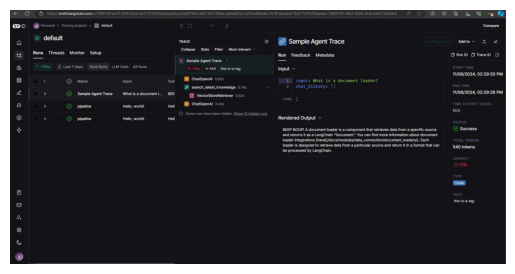

In [15]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("default-langsmith.jpg")  # Replace with your image path
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


Using Langchain with Langsmith

In [16]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

In [19]:
prompt=ChatPromptTemplate.from_messages(
    [
        ("system","You are a helpful assistant. Please resposne to the user request only based on the given context"),
        ("user","Question:{question}\nContext:{context}")


    ]


)
model=ChatOpenAI(model="gpt-3.5-turbo")
output_parser=StrOutputParser()

chain=prompt|model|output_parser
question="Con you provide contestants, reults and how?"
context="""Donald Trump has won victory in the race for the presidency of the United States, gaining a historic second term.

He passed the critical threshold of 270 electoral college votes with a projected win in the state of Wisconsin.

Meanwhile, the Republicans are also set to take control of the Senate.

What exit polls tell us about how people voted
The US exit polls help build a picture of how different groups of people have voted across the nation. Exit poll data is updated throughout the night.

The latest numbers suggest that women broke for Kamala Harris but perhaps not by the margins her campaign had hoped, at 54% compared with 44% for Donald Trump."""

print(chain.invoke({"question":question,"context":context}))

Based on the information provided, Donald Trump has won a historic second term as President of the United States, surpassing the 270 electoral college votes needed. Additionally, the Republicans are projected to take control of the Senate. Exit polls indicate that women voted in favor of Kamala Harris at 54%, compared to 44% for Donald Trump.


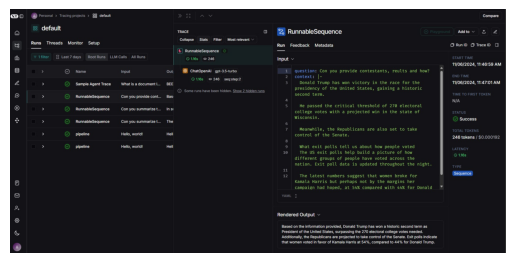

In [20]:
img = Image.open("/content/langsmith-with-langchain.jpg")  # Replace with your image path
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()